# Begin Imports

In [1]:
!pip install sklearn --upgrade 

  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2951 sha256=72ba89ceff2e2d43dd043cfe8e5201e63a4cbf43069b503ded22b5f87568efb4
  Stored in directory: c:\users\cathe\appdata\local\pip\cache\wheels\03\61\53\21519b8371113a5c7b5ccb013e156b2b9b236d6fbf2628e06e
Successfully built sklearn
  Attempting uninstall: sklearn
    Found existing installation: sklearn 0.0.post7
    Uninstalling sklearn-0.0.post7:
      Successfully uninstalled sklearn-0.0.post7


In [2]:
import sklearn
sklearn.__version__

'1.1.3'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
from sklearn import set_config

In [4]:
import joblib
loaded = joblib.load('reg_l01.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'Linear Regression', 'Decision Tree'])

# Begin Preprocessing

In [5]:
X_train = loaded['X_train']
y_train = loaded['y_train']
X_test = loaded['X_test']
y_test = loaded['y_test']
linreg_model = loaded['Linear Regression']
dec_model = loaded['Decision Tree']

In [6]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [7]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

In [8]:
numeric_pipe = make_pipeline(mean_imputer)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [9]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [10]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple, verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000013816623760>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000138166B5AF0>)],
                  verbose_feature_names_out=False)

In [11]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000013816623760>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000138166B5AF0>)],
                  verbose_feature_names_out=False)

In [12]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed= preprocessor.transform(X_test)

In [13]:
X_train_processed = pd.DataFrame(preprocessor.transform(X_train),columns= preprocessor.get_feature_names_out(), index=X_train.index)
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.350,0.029565,256.4646,2009.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,15.250,0.000000,179.7660,2009.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,12.350,0.158716,157.2946,1999.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,7.975,0.014628,82.3250,2004.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,19.350,0.016645,120.9098,2002.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
X_test_processed = pd.DataFrame(preprocessor.transform(X_test),columns= preprocessor.get_feature_names_out(), index=X_test.index)
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.300000,0.026300,79.4302,1987.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,7.930000,0.071136,42.7086,1997.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,14.500000,0.041313,42.0454,1999.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,12.904458,0.044767,173.7054,1985.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,10.195000,0.012456,197.5110,2004.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [16]:
preprocessor.get_feature_names_out()

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Si

In [17]:
X_train_processed.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High

In [18]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = preprocessor.get_feature_names_out()
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [19]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax


In [20]:
## Fitting and evaluating the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)

Split,R^2,MAE,RMSE
Train,0.56,847.15,"1,138.95"
Test,0.57,804.20,"1,093.02"


# Model 1 Linear Regression

In [21]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

# Extracting and Visualizing Coefficients

In [22]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [23]:
X_train_processed.iloc[0]

Item_Weight                          16.350000
Item_Visibility                       0.029565
Item_MRP                            256.464600
Outlet_Establishment_Year          2009.000000
Item_Fat_Content_LF                   0.000000
Item_Fat_Content_Low Fat              1.000000
Item_Fat_Content_Regular              0.000000
Item_Fat_Content_low fat              0.000000
Item_Fat_Content_reg                  0.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   1.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Sea

In [24]:
coeffs = get_coefficients(lin_reg)
coeffs

Item_Weight                           -2.018351
Item_Visibility                     -422.374939
Item_MRP                              15.715542
Outlet_Establishment_Year            -19.650740
Item_Fat_Content_LF                  -64.334853
Item_Fat_Content_Low Fat              -4.863129
Item_Fat_Content_Regular              59.519729
Item_Fat_Content_low fat              57.277190
Item_Fat_Content_reg                 -47.598937
Item_Type_Baking Goods               -19.483134
Item_Type_Breads                     -47.924135
Item_Type_Breakfast                   26.983524
Item_Type_Canned                       8.079370
Item_Type_Dairy                     -126.659331
Item_Type_Frozen Foods               -19.880444
Item_Type_Fruits and Vegetables       27.193595
Item_Type_Hard Drinks                 -6.801301
Item_Type_Health and Hygiene           8.264246
Item_Type_Household                  -12.978862
Item_Type_Meat                       -31.537346
Item_Type_Others                     -43

In [25]:
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)

In [26]:
coeffs.sort_values()

Outlet_Type_Grocery Store         -1,104.3214
Outlet_Identifier_OUT010            -629.3265
Outlet_Identifier_OUT019            -474.9949
Item_Visibility                     -422.3749
Outlet_Identifier_OUT045            -189.8446
Outlet_Location_Type_Tier 1         -141.9865
Item_Type_Dairy                     -126.6593
Outlet_Size_High                     -82.7554
Outlet_Identifier_OUT013             -82.7554
Item_Fat_Content_LF                  -64.3349
Item_Type_Soft Drinks                -57.9261
Outlet_Size_Small                    -53.9247
Item_Type_Breads                     -47.9241
Item_Fat_Content_reg                 -47.5989
Item_Type_Others                     -43.4801
Item_Type_Snack Foods                -40.9085
Item_Type_Meat                       -31.5373
Item_Type_Frozen Foods               -19.8804
Outlet_Establishment_Year            -19.6507
Item_Type_Baking Goods               -19.4831
Item_Type_Household                  -12.9789
Item_Type_Hard Drinks             

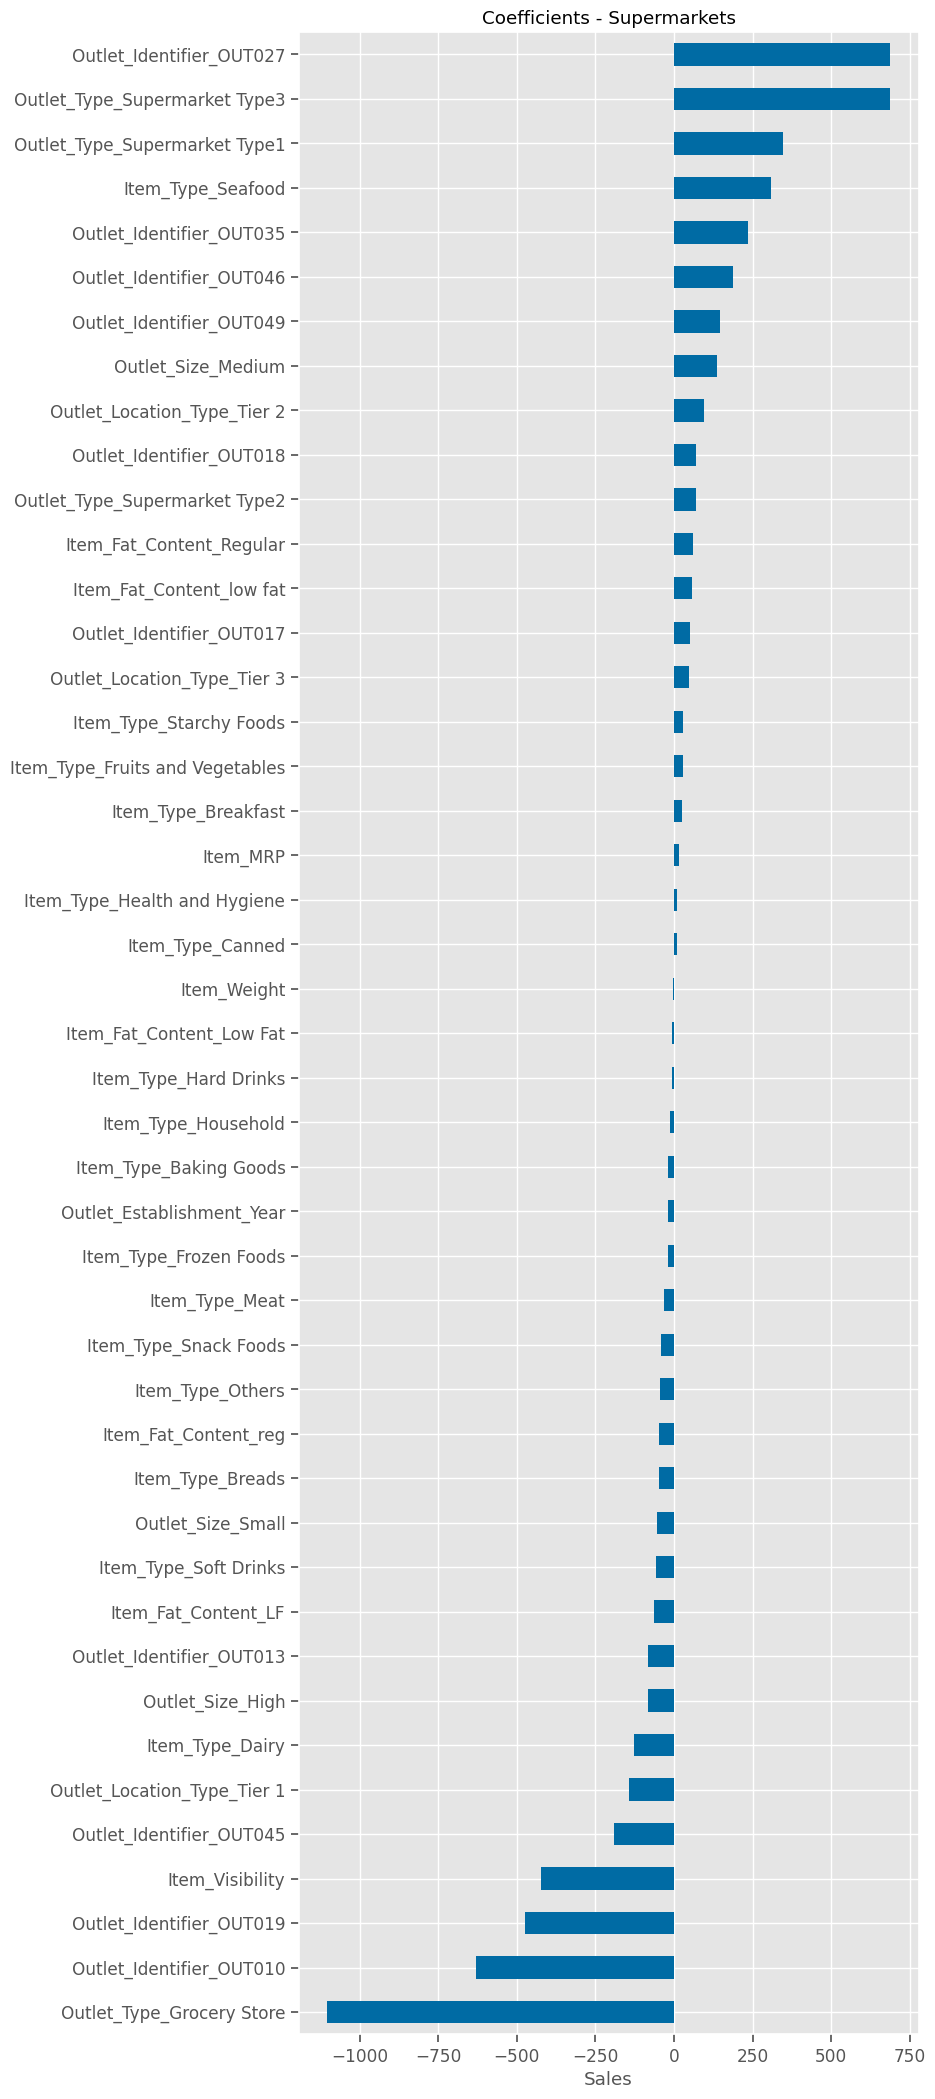

In [27]:
ax = plt.subplots()
ax = coeffs.drop("intercept").sort_values().plot(kind='barh', figsize=(8,26))
ax.set(xlabel='Sales', title="Coefficients - Supermarkets");

# Top three Coefficients

Outlet_Type_Grocery Store         -1,104.3214

Outlet_Identifier_OUT010            -629.3265

Outlet_Identifier_OUT027             688.1500

For the Outlet_Type_Grocery Store, every food sold, there will be a negative 1,104  on it. 

For the Outlet_Identifier_OUT010, every sample sold, there will be a negative 629 on it.

For the Outlet_Identifier_OUT027, every sample sold, there will be a positive 688 on it.


# Model 2 Decision Tree Regressor

In [28]:
dec_model.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

Split,R^2,MAE,RMSE
Train,0.70,616.61,935.56
Test,0.52,799.95,"1,154.97"


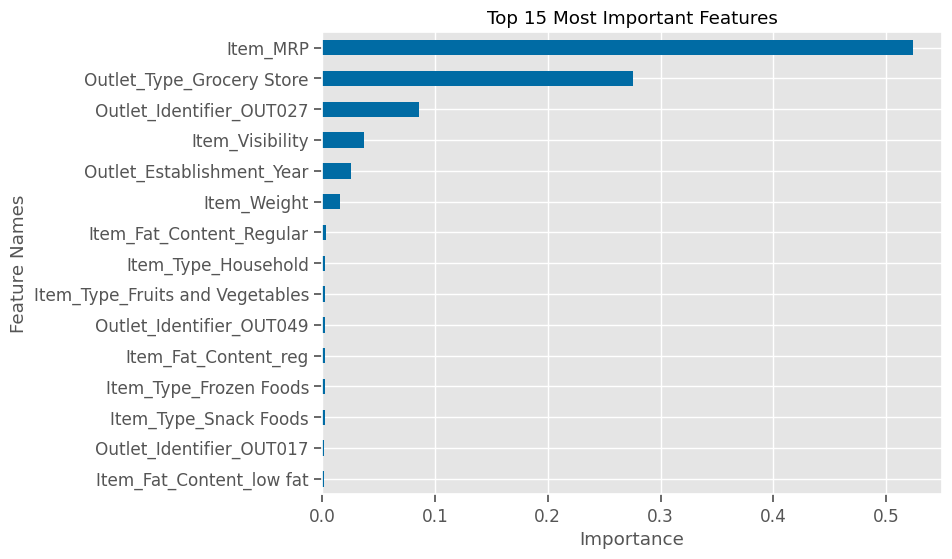

In [29]:
evaluate_regression(dec_model,X_train_processed, y_train, X_test_processed,y_test)
loaded_importances = get_importances(dec_model)
plot_importance_color(loaded_importances,top_n=15,color_dict=None);

- Top 5 Features 
1. Item_MRP
2. Outlet_Type_Grocery Store
3. Outlet_Identifier_OUT027
4. Item_Visibility
5. Outlet_Establishment_Year


# SHAP

In [30]:
import shap
shap.initjs()

In [31]:
len(X_train)

6392

In [32]:
X_shap = shap.sample(X_train_processed,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,15.8500,0.1107,36.9506,"2,007.0000",0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2497,15.1000,0.0874,221.8456,"1,997.0000",0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7723,17.5000,0.0156,184.8266,"2,002.0000",0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8117,10.8000,0.0498,243.2144,"2,002.0000",0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7475,15.0000,0.0450,140.4838,"2,002.0000",0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [33]:
y_shap = y_train.loc[X_shap.index]
y_shap 

3888      759.0120
2497      663.1368
7723    2,766.3990
8117    1,225.0720
7475    1,685.8056
290       569.2590
5341    1,018.6740
6755    1,318.2840
7903    1,498.0500
662     3,057.3536
5806      622.5230
2431    2,348.9424
8272    1,215.7508
7415    4,390.2852
7690    7,943.6598
2541    2,090.6120
5429    1,118.5440
4246    1,693.7952
2270      695.0952
3845    2,101.2648
3481    1,821.6288
6996      143.8128
1986    1,402.1748
3841    1,773.6912
1258      466.0600
793     2,045.3376
1150    3,038.7112
5988    2,217.1140
1675    2,007.3870
3574    1,867.5690
6172      873.5296
365     3,610.6334
1190    2,328.3026
1218      918.8040
1444      884.1824
4357    2,693.8268
830     1,358.2320
7286    1,102.5648
2466    1,800.3232
2850      744.3644
8030      364.8584
8165    4,327.7000
2035      480.7076
7679    1,438.1280
6224      761.0094
720       554.6114
7094      255.6672
3249    1,677.8160
3987    1,342.2528
819     3,942.8676
3699      415.4592
2060    1,145.1760
1050    1,09

In [34]:
## Using the entire dataset (still relatively small)
X_shap = pd.concat([X_train_processed, X_test_processed])

In [35]:
y_shap = pd.concat([y_train,y_test])
y_shap

4776      515.3292
7510    3,056.0220
5828    1,577.9460
5327    1,331.6000
4810    1,687.1372
4377      111.8544
2280    1,151.1682
8198    3,401.5722
7514    3,570.0196
3463    1,523.3504
7851    3,528.7400
4595    5,273.1360
4766    1,765.7016
1541    3,091.9752
6162      645.8260
322       958.7520
2031    2,556.6720
3847    1,657.8420
7301    3,728.4800
6820    1,258.3620
7092    1,454.1072
110       699.0900
8099    5,219.8720
4891    6,608.0650
1079    2,931.5174
8125    3,757.1094
7413    1,733.7432
5344      135.8232
2291    5,159.2842
1164    4,819.0604
2276      206.3980
1450   11,445.1020
3908    1,304.9680
5852    3,615.2940
7580      495.3552
4367    5,201.2296
6252    2,976.1260
5874    1,864.2400
2954      739.0380
2531    2,087.9488
3684      163.7868
5274    5,424.9384
5180      359.5320
2908    3,731.8090
1514    3,368.9480
7439    2,816.3340
1451    1,346.2476
2020    3,083.9856
2753      592.5620
6572    1,390.1904
4506      340.2238
7340    1,618.5598
838     3,06

In [36]:
## Resetting the index for sampled data to match shap_values integer index
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

In [37]:
X_shap = X_shap.sort_index()
y_shap = y_shap.sort_index()
display(X_shap.head(),y_shap.head())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,16.3500,0.0296,256.4646,"2,009.0000",0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000
1,15.2500,0.0000,179.7660,"2,009.0000",0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000
2,12.3500,0.1587,157.2946,"1,999.0000",0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,7.9750,0.0146,82.3250,"2,004.0000",0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,...,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,19.3500,0.0166,120.9098,"2,002.0000",0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000


0     515.3292
1   3,056.0220
2   1,577.9460
3   1,331.6000
4   1,687.1372
Name: Item_Outlet_Sales, dtype: float64

In [38]:
explainer = shap.Explainer(linreg_model, X_shap)
explainer

In [39]:
shap_values = explainer(X_shap)
type(shap_values)

shap._explanation.Explanation

In [40]:
X_shap.shape

(8523, 45)

In [41]:
shap_values.shape

(8523, 45)

In [42]:
shap_values[0]

.values =
array([-2.68796553e+01,  5.92607601e-01,  1.18049171e+05,  8.61402408e+14,
        9.00446566e+11, -2.83783899e+13,  2.44797855e+13,  1.75055255e+11,
       -0.00000000e+00, -1.07970987e+13, -2.51184705e+12, -1.75294874e+12,
       -1.48887480e+13, -1.24790694e+13, -9.18932283e+12, -2.91773394e+13,
       -2.46960210e+12, -7.36875347e+12,  1.46948723e+14, -1.08861570e+12,
       -3.62126819e+12,  0.00000000e+00, -2.68439077e+13, -5.68484491e+12,
       -7.02063126e+11,  2.63085890e+13,  1.47424400e+12, -9.12724723e+11,
       -1.73815197e+14,  2.38262161e+13,  2.07280406e+13,  1.68499097e+13,
       -4.50383437e+12,  4.21283735e+13,  2.04149570e+13,  1.36913475e+13,
        2.37217446e+13, -8.49106932e+13,  1.25191425e+13,  1.55948592e+14,
        3.02791477e+13, -9.59880281e+12,  2.54642333e+14, -2.94008837e+14,
        1.44264681e+13])

.base_values =
1.6511813012067405e+17

.data =
array([1.6350000e+01, 2.9565309e-02, 2.5646460e+02, 2.0090000e+03,
       0.0000000e+00, 1.0

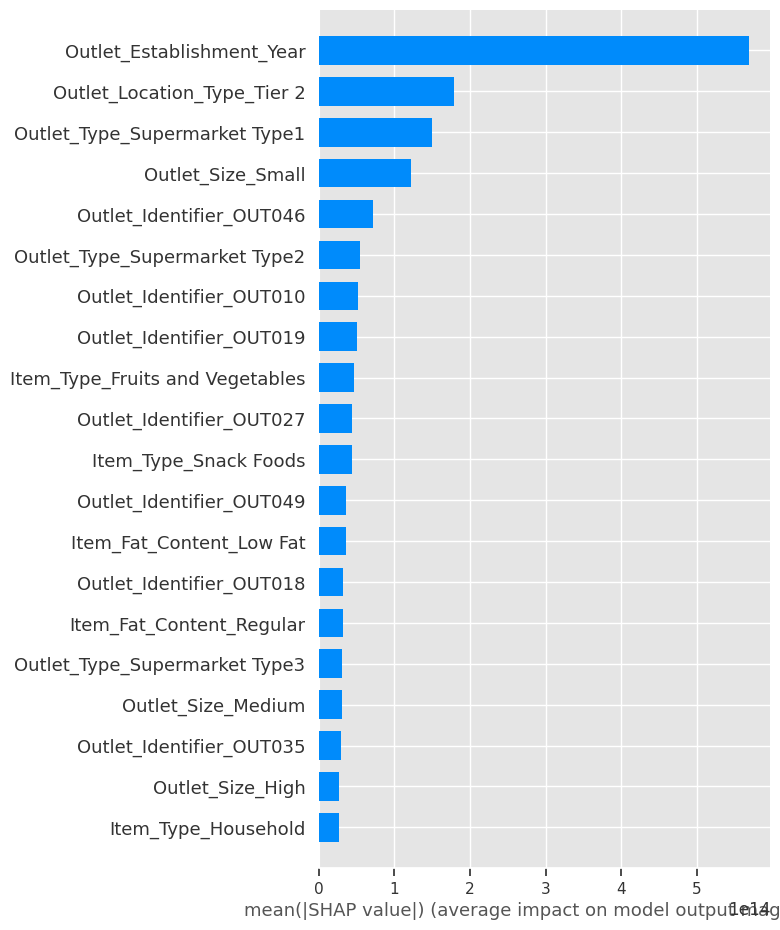

In [43]:
shap.summary_plot(shap_values, features= X_shap, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


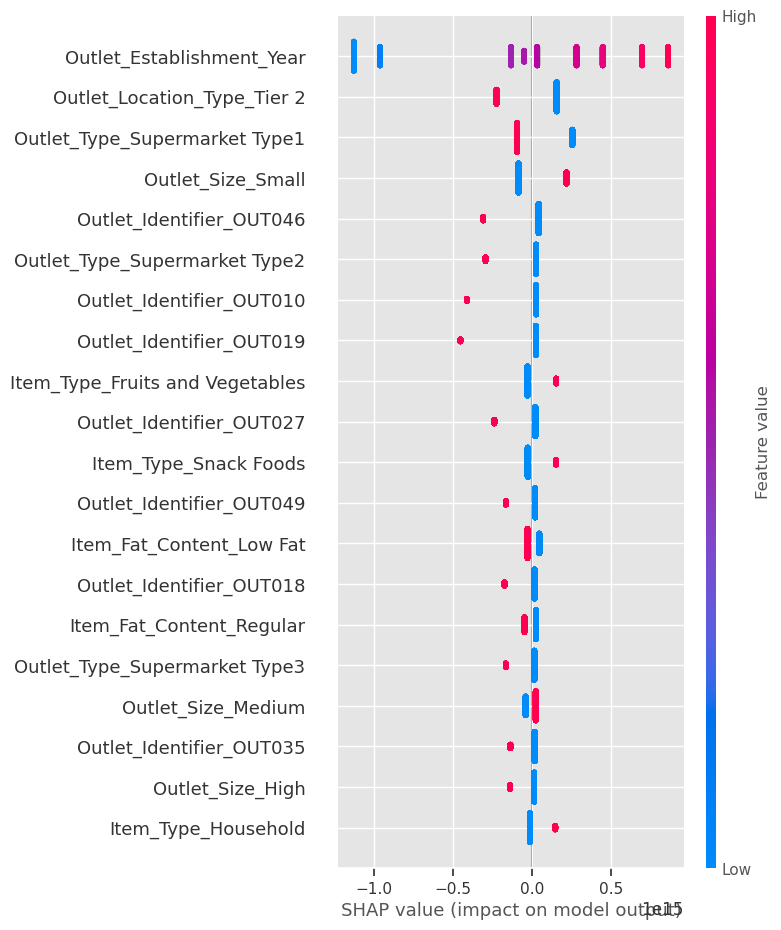

In [47]:
shap.summary_plot(shap_values,X_shap)

# Local Explanations

In [49]:
X_shap = shap.sample(X_train_processed, nsamples=400,random_state=321)
y_shap = y_train.loc[X_shap.index]

In [50]:
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [61]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap_local.values,  
    feature_names=X_shap_local.columns, 
    Outlet_Establishment_Year=
   mode='Regression')
lime_explainer

In [62]:
example_grp_Pass_Low.head()

NameError: name 'example_grp_Pass_Low' is not defined

In [55]:
exp = lime_explainer.explain_instance(example_grp_High_Low, reg.predict_proba)
exp.show_in_notebook()

NameError: name 'lime_explainer' is not defined

In [56]:
fig =exp.as_pyplot_figure();
axes = fig.get_axes()
axes[0].axvline(0,color='k');

NameError: name 'exp' is not defined

In [57]:
exp = lime_explainer.explain_instance(example_grp_high_fail, rf_clf.predict_proba)
exp.show_in_notebook()

NameError: name 'lime_explainer' is not defined

In [58]:
exp = lime_explainer.explain_instance(example_grp_high_pass, rf_clf.predict_proba)
exp.show_in_notebook()

NameError: name 'lime_explainer' is not defined

In [59]:
exp = lime_explainer.explain_instance(example_grp_low_fail, rf_clf.predict_proba)
exp.show_in_notebook()

NameError: name 'lime_explainer' is not defined

In [60]:
exp = lime_explainer.explain_instance(example_grp_low_pass, rf_clf.predict_proba)
exp.show_in_notebook()

NameError: name 'lime_explainer' is not defined